# Sartorious experiments data-plotting code

In [2]:
# Importing python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 

# Importing files
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments'

std = '817'

df_man = pd.read_csv(folder+r'\Cleaned_Data\Viscosity_std_'+std+'_modified.csv')

df_exp2 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp2.csv')

df_exp3 = pd.read_csv(folder+r'\Code\Viscosity_std_'+std+'_BOTorch_exp3.csv')

In [3]:
df_exp2

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
0,Viscosity_std_817,rLine1000,1000.0,54.163119,54.163119,False,10,10,0,0.8466,99.887378,0.662127,-21.789827,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
1,Viscosity_std_817,rLine1000,500.0,54.163119,54.163119,False,10,10,0,0.8466,81.678808,0.377640,-10.786600,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
2,Viscosity_std_817,rLine1000,300.0,54.163119,54.163119,False,10,10,0,0.8466,74.429541,0.222152,-12.531833,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
3,Viscosity_std_817,rLine1000,300.0,67.703899,67.703899,False,10,10,0,0.8466,72.742604,0.208950,-17.729666,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
4,Viscosity_std_817,rLine1000,500.0,67.703899,67.703899,False,10,10,0,0.8466,78.088005,0.357940,-15.440554,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
5,Viscosity_std_817,rLine1000,1000.0,67.703899,67.703899,False,10,10,0,0.8466,92.604765,0.625306,-26.139139,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
6,Viscosity_std_817,rLine1000,300.0,67.703899,5.416312,False,10,10,0,0.8466,123.143836,0.224381,-11.654053,Incomplete aspiration,Blowout before,3.0,219.397675,None
7,Viscosity_std_817,rLine1000,500.0,67.703899,5.416312,False,10,10,0,0.8466,164.879152,0.385159,-9.010387,Incomplete aspiration,Blowout before,3.0,219.397675,None
8,Viscosity_std_817,rLine1000,1000.0,67.703899,5.416312,False,10,10,0,0.8466,262.773947,0.783986,-7.395961,Incomplete aspiration,Blowout before,3.0,219.397675,None
9,Viscosity_std_817,rLine1000,300.0,5.416312,67.703899,False,10,10,0,0.8466,123.389327,0.226654,-10.759062,Incomplete dispense,Blowout before,4.0,219.397675,None


In [8]:
counter =1 
for i in range(0,len(df_exp2)+1,3):
    df_exp2.loc[i:i+3,'iteration']=counter
    counter+=1
df_exp2 

In [9]:
counter =1 
for row in df_exp3.drop_duplicates(['aspiration_rate','dispense_rate']).iterrows():
    df_repeat = df_exp3.loc[:,['aspiration_rate','dispense_rate']]== row[1].loc[['aspiration_rate','dispense_rate']]
    index = df_repeat.where(df_repeat.sum(axis=1)==2).dropna().index
    df_exp3.loc[index,'iteration']=counter
    counter+=1
volumes = ['1000.0','500.0','300.0']
for volume in volumes:
    index = df_exp3.where(df_exp3.volume==volume).dropna(how='all').index
    df_exp3.loc[index,'volume'] = volume[:-2]

df_exp3

,liquid,pipette,volume,aspiration_rate,dispense_rate,blow_out,delay_aspirate,delay_dispense,delay_blow_out,density,time,m,%error,Transfer_Observation,Comment,iteration,time_asp_1000,acq_value
0,Viscosity_std_817,rLine1000,1000,54.163119,54.163119,False,10.0,10.0,0.0,0.8466,99.887378,0.662127,-21.789827,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
1,Viscosity_std_817,rLine1000,500,54.163119,54.163119,False,10.0,10.0,0.0,0.8466,81.678808,0.377640,-10.786600,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
2,Viscosity_std_817,rLine1000,300,54.163119,54.163119,False,10.0,10.0,0.0,0.8466,74.429541,0.222152,-12.531833,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
3,Viscosity_std_817,rLine1000,"mean[300, 500, 1000]",54.163119,54.163119,False,10.0,10.0,0.0,0.8466,99.887378,0.662127,-15.036087,Incomplete aspiration and dispense,Blowout before,1.0,56.925496,None
4,Viscosity_std_817,rLine1000,300,67.703899,67.703899,False,10.0,10.0,0.0,0.8466,72.742604,0.208950,-17.729666,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
5,Viscosity_std_817,rLine1000,500,67.703899,67.703899,False,10.0,10.0,0.0,0.8466,78.088005,0.357940,-15.440554,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
6,Viscosity_std_817,rLine1000,1000,67.703899,67.703899,False,10.0,10.0,0.0,0.8466,92.604765,0.625306,-26.139139,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
7,Viscosity_std_817,rLine1000,"mean[300, 500, 1000]",67.703899,67.703899,False,10.0,10.0,0.0,0.8466,72.742604,0.208950,-19.769786,Incomplete aspiration and dispense,Blowout before,2.0,49.540396,None
8,Viscosity_std_817,rLine1000,300,67.703899,5.416312,False,10.0,10.0,0.0,0.8466,123.143836,0.224381,-11.654053,Incomplete aspiration,Blowout before,3.0,219.397675,None
9,Viscosity_std_817,rLine1000,500,67.703899,5.416312,False,10.0,10.0,0.0,0.8466,164.879152,0.385159,-9.010387,Incomplete aspiration,Blowout before,3.0,219.397675,None


#### Plot for exp2 and manual calibration

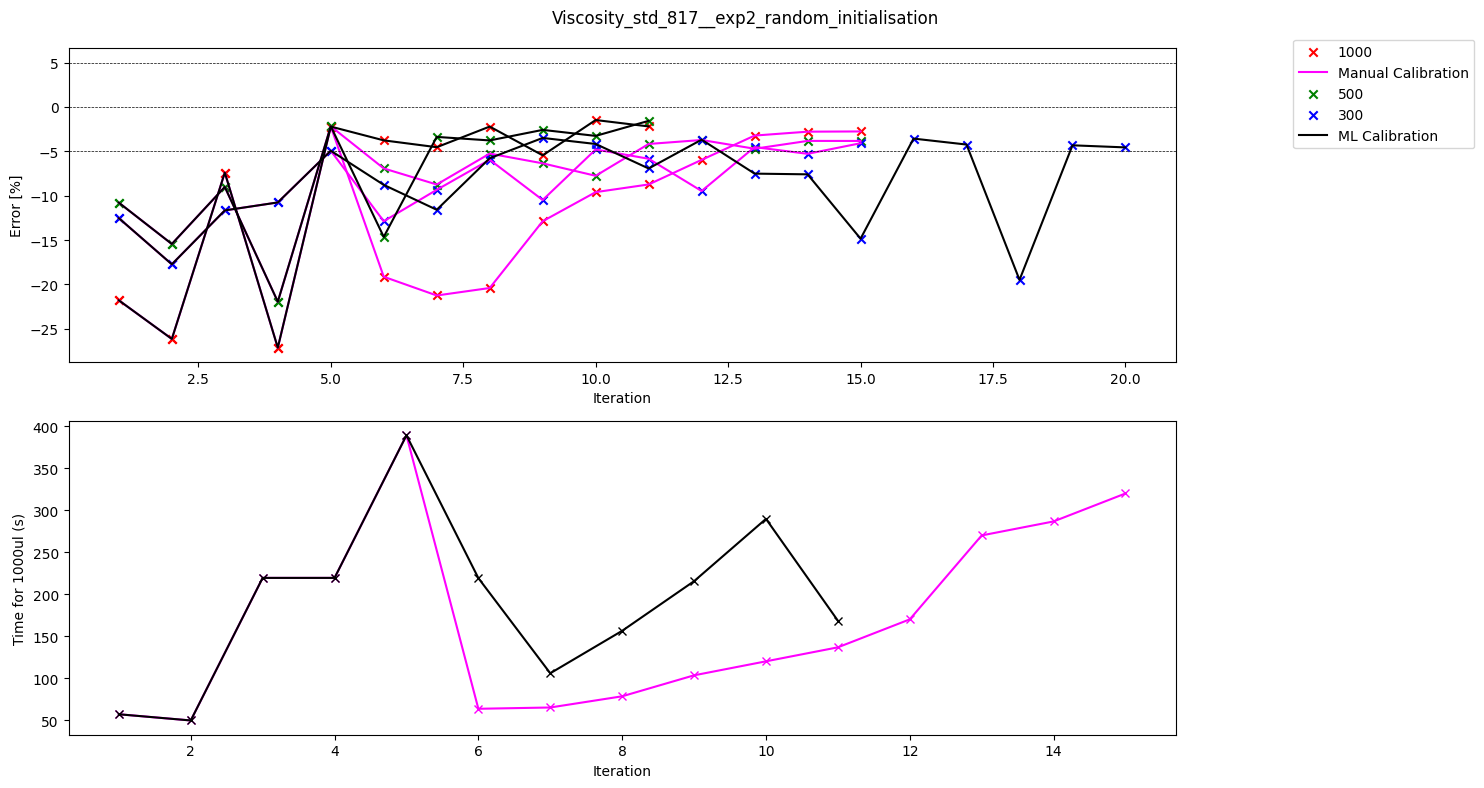

In [10]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp2_1000 = df_exp2.where(df_exp2.volume==1000).dropna(how='all')
df_exp2_500 = df_exp2.where(df_exp2.volume==500).dropna(how='all')
df_exp2_300 = df_exp2.where(df_exp2.volume==300).dropna(how='all')
df_exp2_100 = df_exp2.where(df_exp2.volume==100).dropna(how='all')

# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

if len(df_exp2_1000) != 0:
    axs[0].scatter(df_exp2_1000['iteration'],df_exp2_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_exp2_1000['iteration'],df_exp2_1000['%error'], label = 'ML Calibration', c = 'black')
if len(df_exp2_500) != 0:
    axs[0].scatter(df_exp2_500['iteration'],df_exp2_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_exp2_500['iteration'],df_exp2_500['%error'], c = 'black')
if len(df_exp2_300) != 0:
    axs[0].scatter(df_exp2_300['iteration'],df_exp2_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_exp2_300['iteration'],df_exp2_300['%error'], c = 'black')
if len(df_exp2_100) != 0:
    axs[0].scatter(df_exp2_100['iteration'],df_exp2_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_exp2_100['iteration'],df_exp2_100['%error'], c = 'black')


axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')
axs[1].plot(df_exp2_1000['iteration'],df_exp2_1000['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'_exp2_random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'_exp2_line.png')


#### Plot for exp3 and manual calibration

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


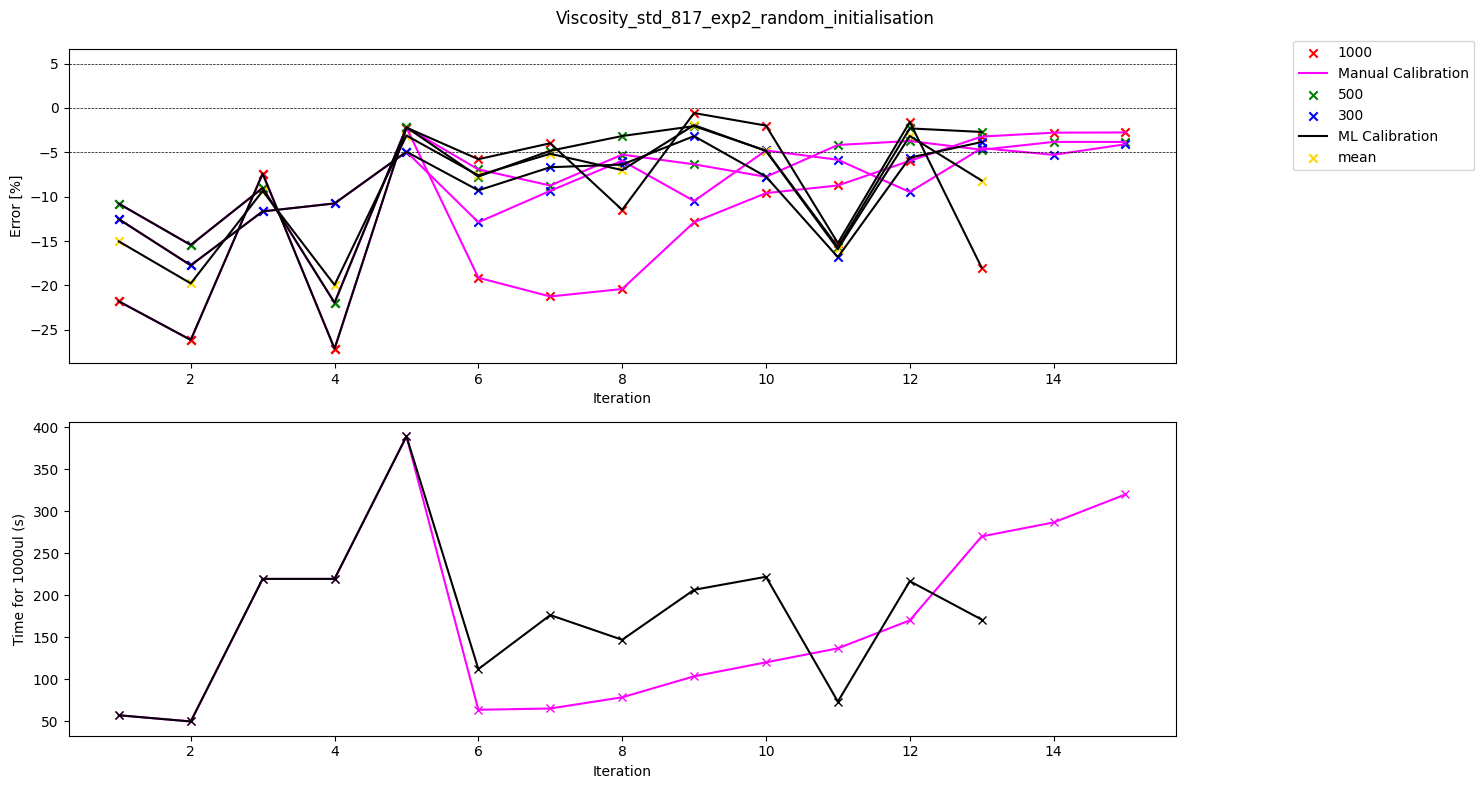

In [11]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all')
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

df_exp3_1000 = df_exp3.where(df_exp3.volume=='1000').dropna(how='all')
df_exp3_500 = df_exp3.where(df_exp3.volume=='500').dropna(how='all')
df_exp3_300 = df_exp3.where(df_exp3.volume=='300').dropna(how='all')
df_exp3_100 = df_exp3.where(df_exp3.volume=='100').dropna(how='all')
df_exp3_mean = df_exp3.where(df_exp3.volume=='mean[300, 500, 1000]').dropna(how='all')

for i in range(len(df_exp3_mean)):
    df_exp3_mean["%error"].iloc[i]=(df_exp3_1000["%error"].iloc[i]+df_exp3_500["%error"].iloc[i]+df_exp3_300["%error"].iloc[i])/3


# Plotting graph 1: Iteration against error
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Manual Calibration', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

if len(df_exp3_1000) != 0:
    axs[0].scatter(df_exp3_1000['iteration'],df_exp3_1000['%error'], marker= 'x', c = 'red')
    axs[0].plot(df_exp3_1000['iteration'],df_exp3_1000['%error'], label = 'ML Calibration', c = 'black')
if len(df_exp3_500) != 0:
    axs[0].scatter(df_exp3_500['iteration'],df_exp3_500['%error'], marker= 'x', c = 'green')
    axs[0].plot(df_exp3_500['iteration'],df_exp3_500['%error'], c = 'black')
if len(df_exp3_300) != 0:
    axs[0].scatter(df_exp3_300['iteration'],df_exp3_300['%error'], marker= 'x', c = 'blue')
    axs[0].plot(df_exp3_300['iteration'],df_exp3_300['%error'], c = 'black')
if len(df_exp3_100) != 0:
    axs[0].scatter(df_exp3_100['iteration'],df_exp3_100['%error'], marker= 'x', c = 'grey')
    axs[0].plot(df_exp3_100['iteration'],df_exp3_100['%error'], c = 'black')

if len(df_exp3_mean) != 0:
    axs[0].scatter(df_exp3_mean['iteration'],df_exp3_mean['%error'], marker= 'x', c = 'gold', label='mean')
    axs[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'], c = 'black')



axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')
axs[1].plot(df_exp3_1000['iteration'],df_exp3_1000['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_'+'exp2_random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# REPO = 'viscosity_liquid_transfer_Pablo'
# folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
# fig.savefig(folder+r'/'+'Viscosity_std_'+std+'exp3_line.png')


#### Line plot for manual calibration + BOTorch experiment 3 (mean)

In [ ]:
#Making subplots (2 rows, 1 column)
fig,axs = plt.subplots(2,1)

# Dropping NAN rows (manual)
df_man_1000 = df_man.where(df_man.volume==1000).dropna(how='all') 
df_man_500 = df_man.where(df_man.volume==500).dropna(how='all')
df_man_300 = df_man.where(df_man.volume==300).dropna(how='all')
df_man_100 = df_man.where(df_man.volume==100).dropna(how='all')

# Dropping NAN rows (exp3)
# df_exp3_1000 = df_exp3.where((df_exp3.volume=='1000.0') or (df_exp3.volume=='1000')).dropna(how='all')
# df_exp3_500 = df_exp3.where((df_exp3.volume=='500.0') or (df_exp3.volume=='500')).dropna(how='all')
# df_exp3_300 = df_exp3.where((df_exp3.volume=='300.0') or (df_exp3.volume=='300')).dropna(how='all')
# df_exp3_100 = df_exp3.where((df_exp3.volume=='100.0') or (df_exp3.volume=='100')).dropna(how='all')
df_exp3_1000 = df_exp3.loc[(df_exp3['volume'] == '1000.0') | (df_exp3['volume'] == '1000')].dropna(how='all')
df_exp3_500 = df_exp3.loc[(df_exp3['volume'] == '500.0') | (df_exp3['volume'] == '500')].dropna(how='all')
df_exp3_300 = df_exp3.loc[(df_exp3['volume'] == '300.0') | (df_exp3['volume'] == '300')].dropna(how='all')
df_exp3_100 = df_exp3.loc[(df_exp3['volume'] == '100.0') | (df_exp3['volume'] == '100')].dropna(how='all')
df_exp3_mean = df_exp3.loc[(df_exp3['volume'] == 'mean[300, 500, 1000]')].dropna(how='all')

# Plotting graph 1: Iteration against error
# Scatterplot for manual calibration
if len(df_man_1000) != 0:
    axs[0].scatter(df_man_1000['iteration'],df_man_1000['%error'], marker= 'x', label = '1000', c = 'red')
if len(df_man_500) != 0:
    axs[0].scatter(df_man_500['iteration'],df_man_500['%error'], marker= 'x', label = '500', c = 'green')
if len(df_man_300) != 0:
    axs[0].scatter(df_man_300['iteration'],df_man_300['%error'], marker= 'x', label = '300', c = 'blue')
if len(df_man_100) != 0:
    axs[0].scatter(df_man_100['iteration'],df_man_100['%error'], marker= 'x', label = '100', c = 'grey')

# Scatterplot for experiment 3
if len(df_exp3_1000) != 0:
    axs[0].scatter(df_exp3_1000['iteration'],df_exp3_1000['%error'], marker= 'x', c = 'red')
if len(df_exp3_500) != 0:
    axs[0].scatter(df_exp3_500['iteration'],df_exp3_500['%error'], marker= 'x', c = 'green')
if len(df_exp3_300) != 0:
    axs[0].scatter(df_exp3_300['iteration'],df_exp3_300['%error'], marker= 'x', c = 'blue')
if len(df_exp3_100) != 0:
    axs[0].scatter(df_exp3_100['iteration'],df_exp3_100['%error'], marker= 'x', c = 'grey')
if len(df_exp3_mean) != 0:
    axs[0].scatter(df_exp3_mean['iteration'],df_exp3_mean['%error'], marker= 'x', c = 'orange')

# Line plot for manual calibration
if len(df_man_1000) != 0:
    axs[0].plot(df_man_1000['iteration'],df_man_1000['%error'], label = 'Human Driven', c = 'magenta')
if len(df_man_500) != 0:
    axs[0].plot(df_man_500['iteration'],df_man_500['%error'], c = 'magenta')
if len(df_man_300) != 0:
    axs[0].plot(df_man_300['iteration'],df_man_300['%error'], c = 'magenta')
if len(df_man_100) != 0:
    axs[0].plot(df_man_100['iteration'],df_man_100['%error'], c = 'magenta')

# Line plot for experiment 3
if len(df_exp3_1000) != 0:
    axs[0].plot(df_exp3_1000['iteration'],df_exp3_1000['%error'], label = 'ML Driven', c = 'black')
if len(df_exp3_500) != 0:
    axs[0].plot(df_exp3_500['iteration'],df_exp3_500['%error'], c = 'black')
if len(df_exp3_300) != 0:
    axs[0].plot(df_exp3_300['iteration'],df_exp3_300['%error'], c = 'black')
if len(df_exp3_100) != 0:
    axs[0].plot(df_exp3_100['iteration'],df_exp3_100['%error'], c = 'black')
if len(df_exp3_mean) != 0:
    axs[0].plot(df_exp3_mean['iteration'],df_exp3_mean['%error'], c = 'black')

# Reference lines
axs[0].axhline(y=0, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=5, ls = '--', color = 'black', linewidth=0.5)
axs[0].axhline(y=-5, ls = '--', color = 'black', linewidth=0.5)

# Figure 1 labels
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Error [%]')

# 2nd figure line graph for manual calibration
axs[1].plot(df_man_1000['iteration'],df_man_1000['time_for_1000'], marker= 'x', label = 'Human Driven ', c = 'magenta')

# 2nd figure line graph for experiment 2
axs[1].plot(df_exp3['iteration'],df_exp3['time_asp_1000'], marker= 'x', label = 'ML Driven ', c = 'black')

# Figure 1 labels
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Time for 1000ul (s)')

#Figure formatting
fig.set_size_inches(15, 8)
fig.suptitle('Viscosity_std_'+std+'_exp3_random_initialisation')
axs[0].legend(bbox_to_anchor=(1.1, 1.05))
fig.tight_layout()

# Saving the graphs
REPO = 'viscosity_liquid_transfer_Pablo'
folder = os.getcwd().split(REPO)[0]+REPO+r'\Sartorious_experiments\Finalised_Data'
fig.savefig(folder+r'/'+'Viscosity_std_'+std+'exp3_line.png')